<a href="https://colab.research.google.com/github/xliee/inferencia-trabajo-2024/blob/main/trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Inferencia

## Introduccion

### Instalacion de librerias

In [1]:
# @title
# install pandas, numpy, matplotlib
%pip install pandas numpy matplotlib seaborn seaborn[stats] scipy rich ipywidgets jupyterlab_widgets

Note: you may need to restart the kernel to use updated packages.


### Cargar Librerias

In [2]:
# @title

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

import warnings
warnings.filterwarnings("ignore")

from rich import box
from rich import print
from rich import pretty
from rich.table import Table
from rich.markdown import Markdown
pretty.install()
%load_ext rich

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Carga de datos y preprocesamiento

In [3]:
# @title Carga de datos { display-mode: "form" }
source = "Internet" # @param ["Local", "Internet"]

filename = 'my2023-fuel-consumption-ratings.csv'
if source == "Internet":
  filename = 'https://open.canada.ca/data/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64/resource/b6100f60-5e63-437d-b122-db76c467c0a7/download/my2023-fuel-consumption-ratings.csv'

# Load the data
df = pd.read_csv(filename, encoding='latin1')
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
3,2023,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2023,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [4]:
# @title Paises { display-mode: "form" }
# @markdown Se crea una variable categórica llamada “país” indicando a qué país pertenece el fabricante del vehículo.

# List different makes
makes = df['Make'].unique()
# print(makes)

# Pais de origen de cada marca
car_brands_origin = {
    'Acura': 'Japón',
    'Alfa Romeo': 'Italia',
    'Aston Martin': 'Reino Unido',
    'Audi': 'Alemania',
    'Bentley': 'Reino Unido',
    'BMW': 'Alemania',
    'Bugatti': 'Francia',
    'Buick': 'Estados Unidos',
    'Cadillac': 'Estados Unidos',
    'Chevrolet': 'Estados Unidos',
    'Chrysler': 'Estados Unidos',
    'Dodge': 'Estados Unidos',
    'FIAT': 'Italia',
    'Ford': 'Estados Unidos',
    'Genesis': 'Corea del Sur',
    'GMC': 'Estados Unidos',
    'Honda': 'Japón',
    'Hyundai': 'Corea del Sur',
    'Infiniti': 'Japón',
    'Jaguar': 'Reino Unido',
    'Jeep': 'Estados Unidos',
    'Kia': 'Corea del Sur',
    'Lamborghini': 'Italia',
    'Land Rover': 'Reino Unido',
    'Lexus': 'Japón',
    'Lincoln': 'Estados Unidos',
    'Maserati': 'Italia',
    'Mazda': 'Japón',
    'Mercedes-Benz': 'Alemania',
    'MINI': 'Reino Unido',
    'Mitsubishi': 'Japón',
    'Nissan': 'Japón',
    'Porsche': 'Alemania',
    'Ram': 'Estados Unidos',
    'Rolls-Royce': 'Reino Unido',
    'Subaru': 'Japón',
    'Toyota': 'Japón',
    'Volkswagen': 'Alemania',
    'Volvo': 'Suecia'
}

# Nueva columna
df['Country'] = df['Make'].map(car_brands_origin)
df.head(5)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating,Country
0,2023,Acura,Integra,Full-size,1.5,4,AV7,Z,7.9,6.3,7.2,39,167,6,7,Japón
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7,Japón
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6,Japón
3,2023,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5,Japón
4,2023,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5,Japón


## 1. Estadística Descriptiva

### Instrucciones
Se procederá a realizar un análisis descriptivo básico de los datos, empleando los estadísticos
más comunes, de dispersión y de centralidad (media, mediana, desviación típica, … ). El análisis
se realizará de modo global y de modo específico según niveles o variables categóricas
escogidas. Además, en esta etapa del estudio se deberá representar visualmente los datos,
usando los distintos tipos de gráficos vistos.


### Procedimiento y requisitos mínimos
La longitud de esta parte del informe (en PDF) debe ser de entre 4 y 6 páginas y deberá contener
como mínimo:
- Estadísticos descriptivos básicos totales: media, mediana, desviación típica, y cuartiles; y
por niveles según la variable categóricas escogida.
- Gráficas que representen e ilustren aspectos significativos del conjunto de datos.
Pueden emplearse: histogramas, gráficos Q- Q y/o gráficos de probabilidad para comparar
muestras, box-plots, diagramas de dispersión ... del conjunto total de los datos y de algunos
subgrupos o niveles concretos de la población.

La discusión y la visualización de los datos obtenidos es donde recaerá la mayor parte del peso
de la evaluación.

### 1.1 Exploración de los datos

In [5]:
# @title Estadísticas descriptivas { display-mode: "form" }
# @markdown Se calculan las estadísticas descriptivas de las variables numéricas.

# Estadísticas descriptivas
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate descriptive statistics only for numeric columns
desc_stats = df[numeric_cols].describe().T
desc_stats.drop('count', axis=1, inplace=True)

# Calculate additional statistics for numeric columns and add them to desc_stats
desc_stats['kurtosis'] = df[numeric_cols].kurtosis()
desc_stats['skewness'] = df[numeric_cols].skew()

# desc_stats
# Show as rich table (mean	std	min	25%	50%	75%	max	kurtosis	skewness)
table = Table(title="Estadísticas descriptivas", box=box.MINIMAL_DOUBLE_HEAD)
table.add_column("", justify="left", style="cyan", no_wrap=True)
table.add_column("μ", justify="left", style="green", no_wrap=True)
table.add_column("σ", justify="left", style="green", no_wrap=True)
table.add_column("Mínimo", justify="left", style="green", no_wrap=True)
table.add_column("25%", justify="left", style="green", no_wrap=True)
table.add_column("50%", justify="left", style="green", no_wrap=True)
table.add_column("75%", justify="left", style="green", no_wrap=True)
table.add_column("Máximo", justify="left", style="green", no_wrap=True)
table.add_column("Kurtosis", justify="left", style="green", no_wrap=True)
table.add_column("Asimetría", justify="left", style="green", no_wrap=True)


for i, col in enumerate(desc_stats.index):
    table.add_row(
        col,
        f"{desc_stats['mean'][col]:.2f}",
        f"{desc_stats['std'][col]:.2f}",
        f"{desc_stats['min'][col]:.2f}",
        f"{desc_stats['25%'][col]:.2f}",
        f"{desc_stats['50%'][col]:.2f}",
        f"{desc_stats['75%'][col]:.2f}",
        f"{desc_stats['max'][col]:.2f}",
        f"{desc_stats['kurtosis'][col]:.2f}",
        f"{desc_stats['skewness'][col]:.2f}"
    )

print(table)

                                             Estadísticas descriptivas                                             
                       ╷         ╷       ╷         ╷         ╷         ╷         ╷         ╷          ╷            
                       │ μ       │ σ     │ Mínimo  │ 25%     │ 50%     │ 75%     │ Máximo  │ Kurtosis │ Asimetría  
 ══════════════════════╪═════════╪═══════╪═════════╪═════════╪═════════╪═════════╪═════════╪══════════╪═══════════ 
  Model year           │ 2023.00 │ 0.00  │ 2023.00 │ 2023.00 │ 2023.00 │ 2023.00 │ 2023.00 │ 0.00     │ 0.00       
  Engine size (L)      │ 3.15    │ 1.35  │ 1.20    │ 2.00    │ 3.00    │ 3.60    │ 8.00    │ 0.34     │ 1.03       
  Cylinders            │ 5.63    │ 1.97  │ 3.00    │ 4.00    │ 6.00    │ 6.00    │ 16.00   │ 2.78     │ 1.30       
  City (L/100 km)      │ 12.43   │ 3.46  │ 4.40    │ 10.10   │ 12.10   │ 14.60   │ 30.30   │ 1.67     │ 0.69       
  Highway (L/100 km)   │ 9.35    │ 2.30  │ 4.40    │ 7.70    │ 9.10    │ 10.70   │ 20.90   │ 1.63     │ 0.88       
  Combined (L/100 km)  │ 11.05   │ 2.88  │ 4.40    │ 9.00    │ 10.70   │ 12.90   │ 26.10   │ 1.69     │ 0.73       
  Combined (mpg)       │ 27.38   │ 7.56  │ 11.00   │ 22.00   │ 26.00   │ 31.00   │ 64.00   │ 2.68     │ 1.21       
  CO2 emissions (g/km) │ 257.47  │ 64.26 │ 104.00  │ 211.00  │ 254.00  │ 299.00  │ 608.00  │ 1.96     │ 0.64       
  CO2 rating           │ 4.52    │ 1.28  │ 1.00    │ 4.00    │ 5.00    │ 5.00    │ 9.00    │ 0.42     │ 0.02       
  Smog rating          │ 5.24    │ 1.67  │ 1.00    │ 5.00    │ 5.00    │ 7.00    │ 8.00    │ 0.14     │ -0.86      
                       ╵         ╵       ╵         ╵         ╵         ╵         ╵         ╵          ╵

Model year  Engine size (L)   Cylinders  City (L/100 km)  \
count       833.0       833.000000  833.000000       833.000000   
mean       2023.0         3.147899    5.627851        12.431453   
std           0.0         1.353076    1.968695         3.456191   
min        2023.0         1.200000    3.000000         4.400000   
25%        2023.0         2.000000    4.000000        10.100000   
50%        2023.0         3.000000    6.000000        12.100000   
75%        2023.0         3.600000    6.000000        14.600000   
max        2023.0         8.000000   16.000000        30.300000   

       Highway (L/100 km)  Combined (L/100 km)  Combined (mpg)  \
count          833.000000           833.000000      833.000000   
mean             9.353661            11.047179       27.375750   
std              2.302312             2.878308        7.559968   
min              4.400000             4.400000       11.000000   
25%              7.700000             9.000000       22.000000   
50%              9.100000            10.700000       26.000000   
75%             10.700000            12.900000       31.000000   
max             20.900000            26.100000       64.000000   

       CO2 emissions (g/km)  CO2 rating  Smog rating  
count            833.000000  833.000000   833.000000  
mean             257.471789    4.522209     5.236495  
std               64.262847    1.279385     1.665693  
min              104.000000    1.000000     1.000000  
25%              211.000000    4.000000     5.000000  
50%              254.000000    5.000000     5.000000  
75%              299.000000    5.000000     7.000000  
max              608.000000    9.000000     8.000000

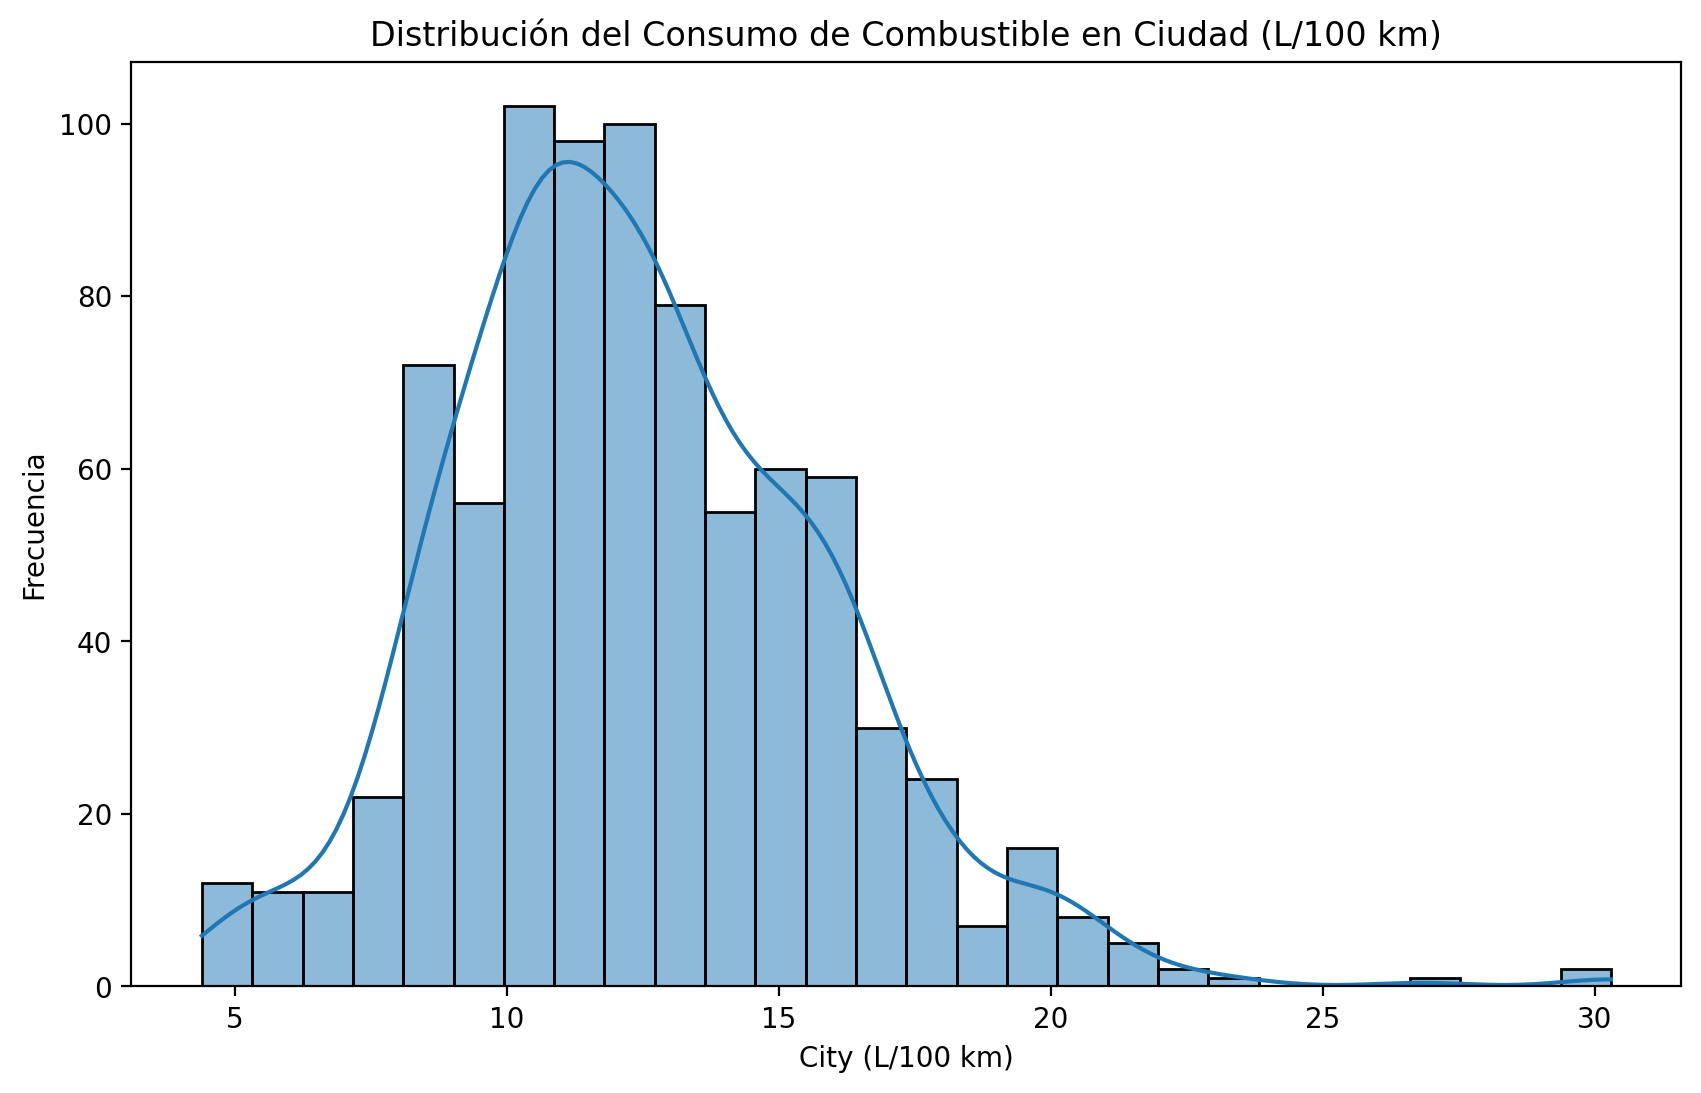

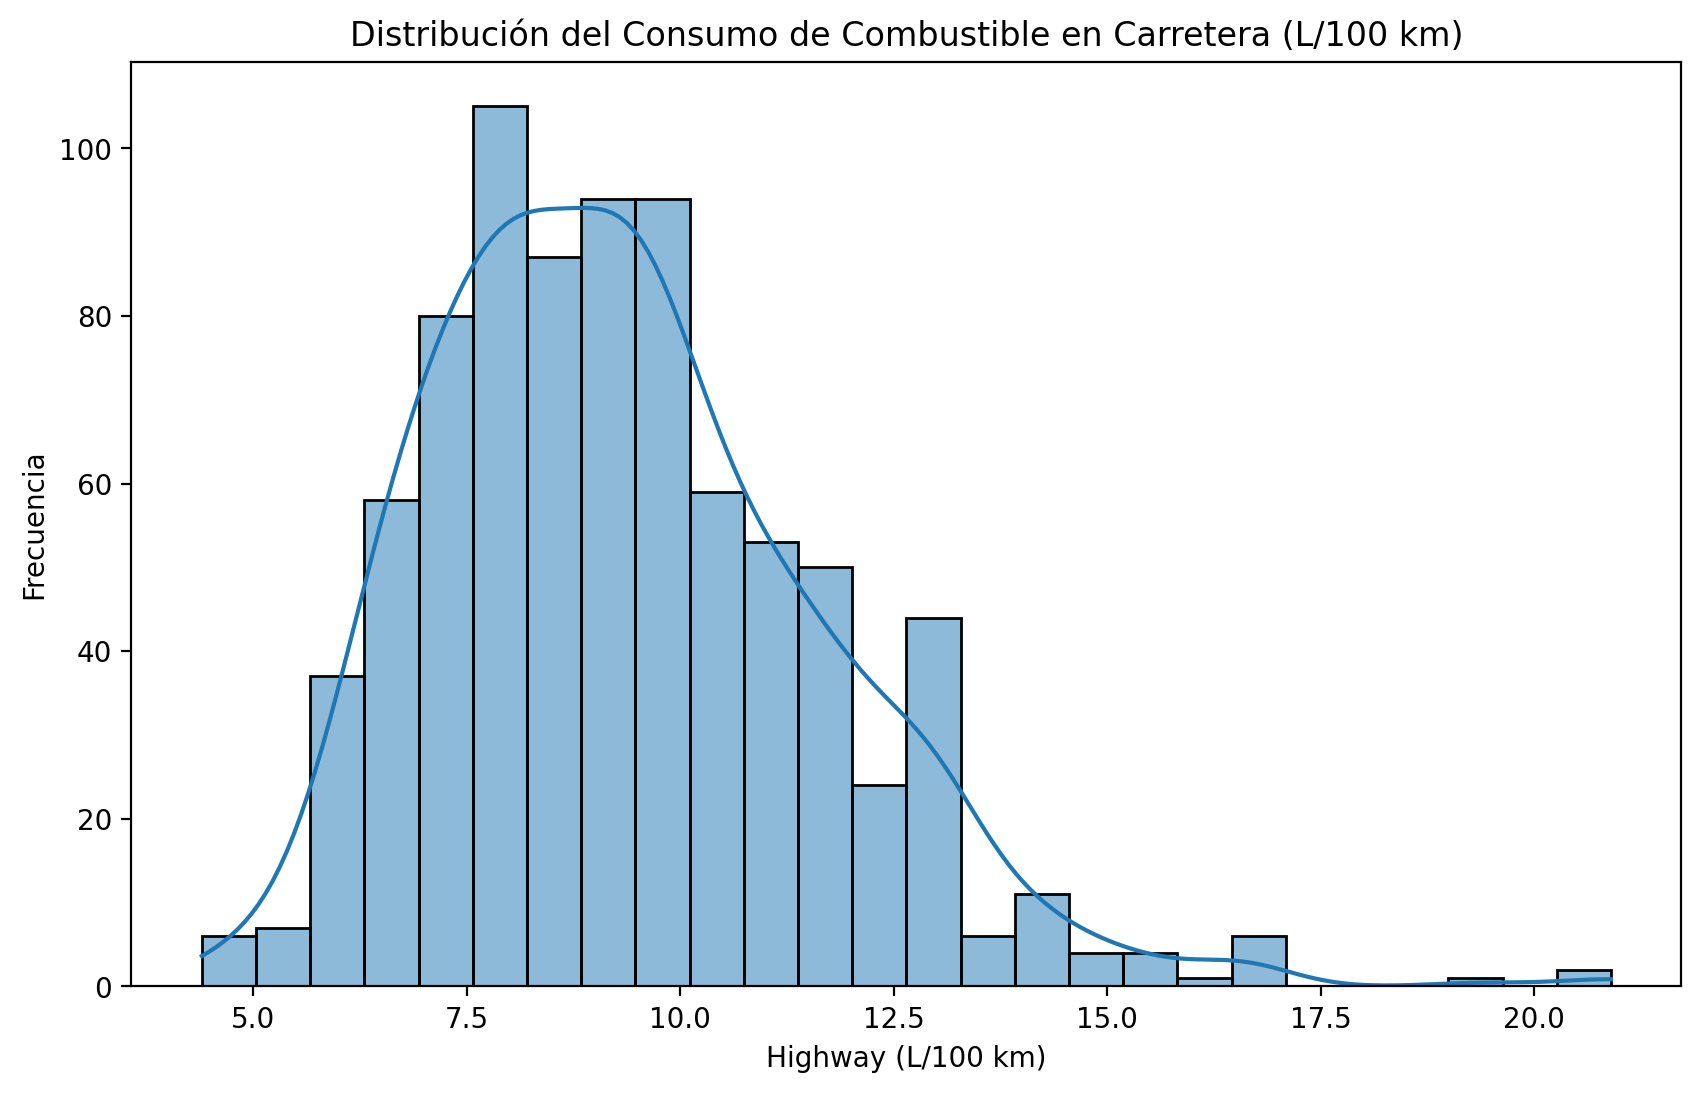

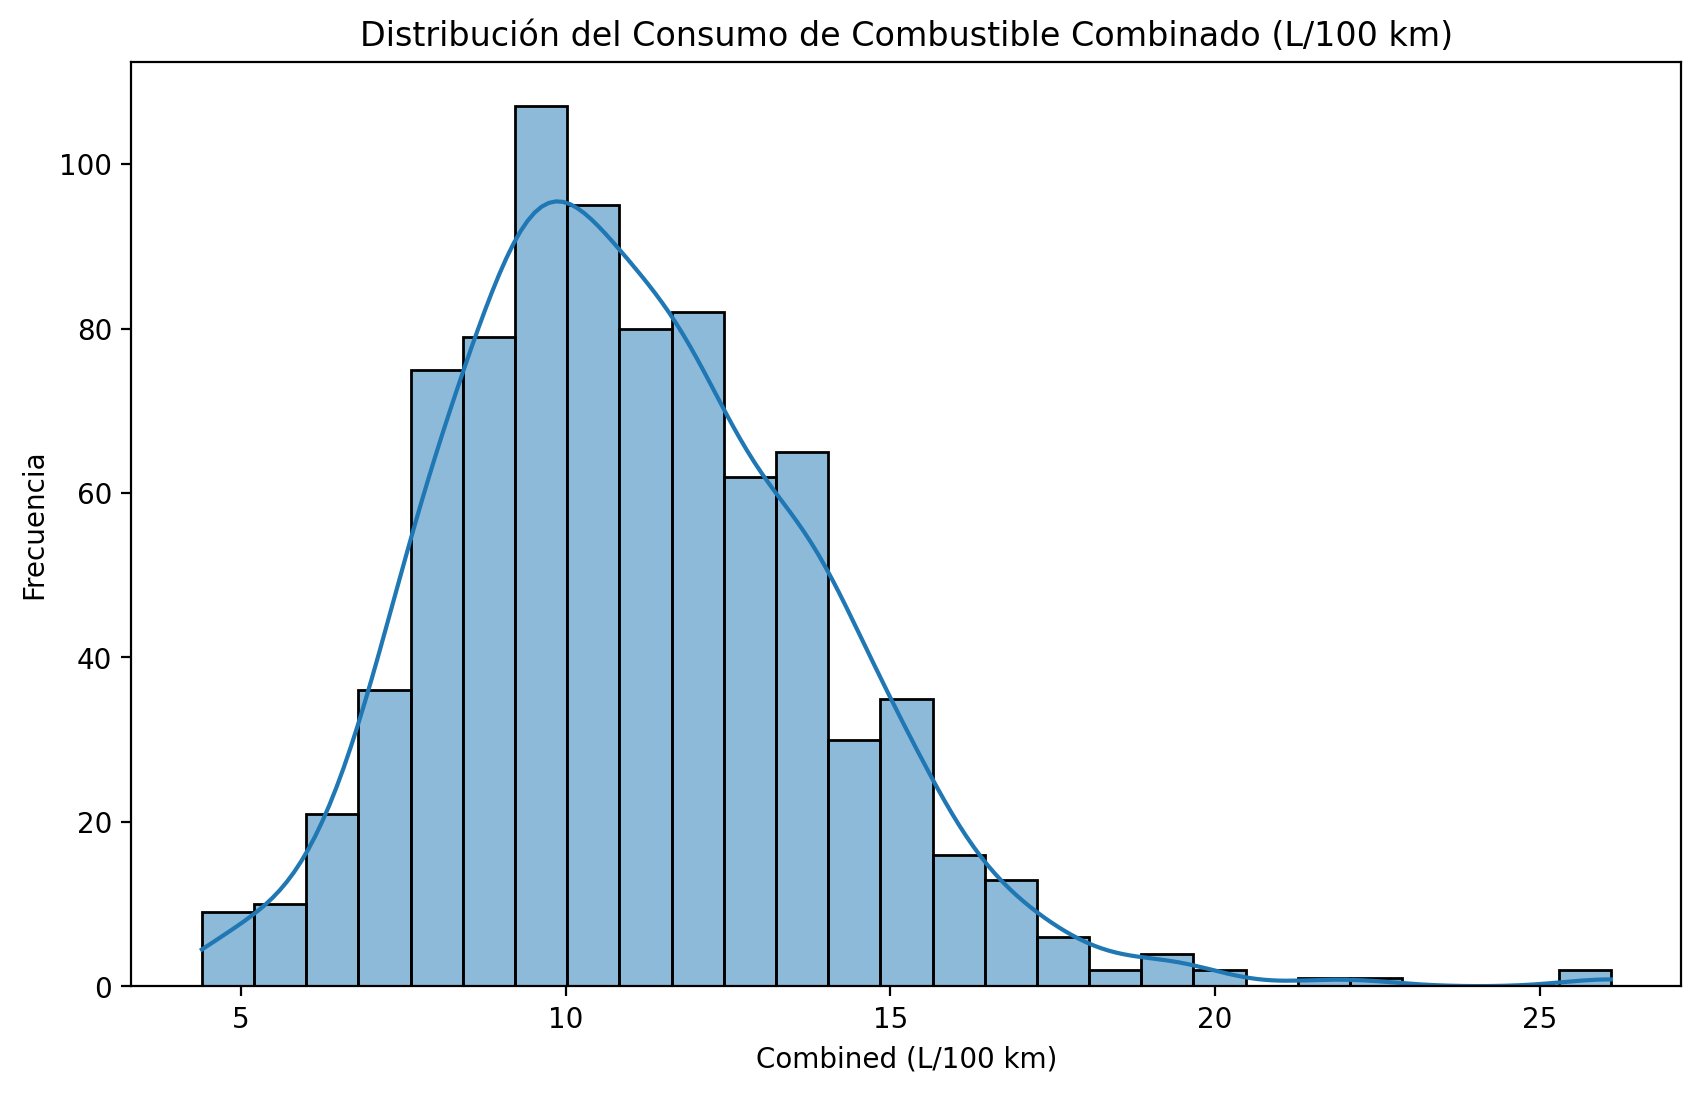

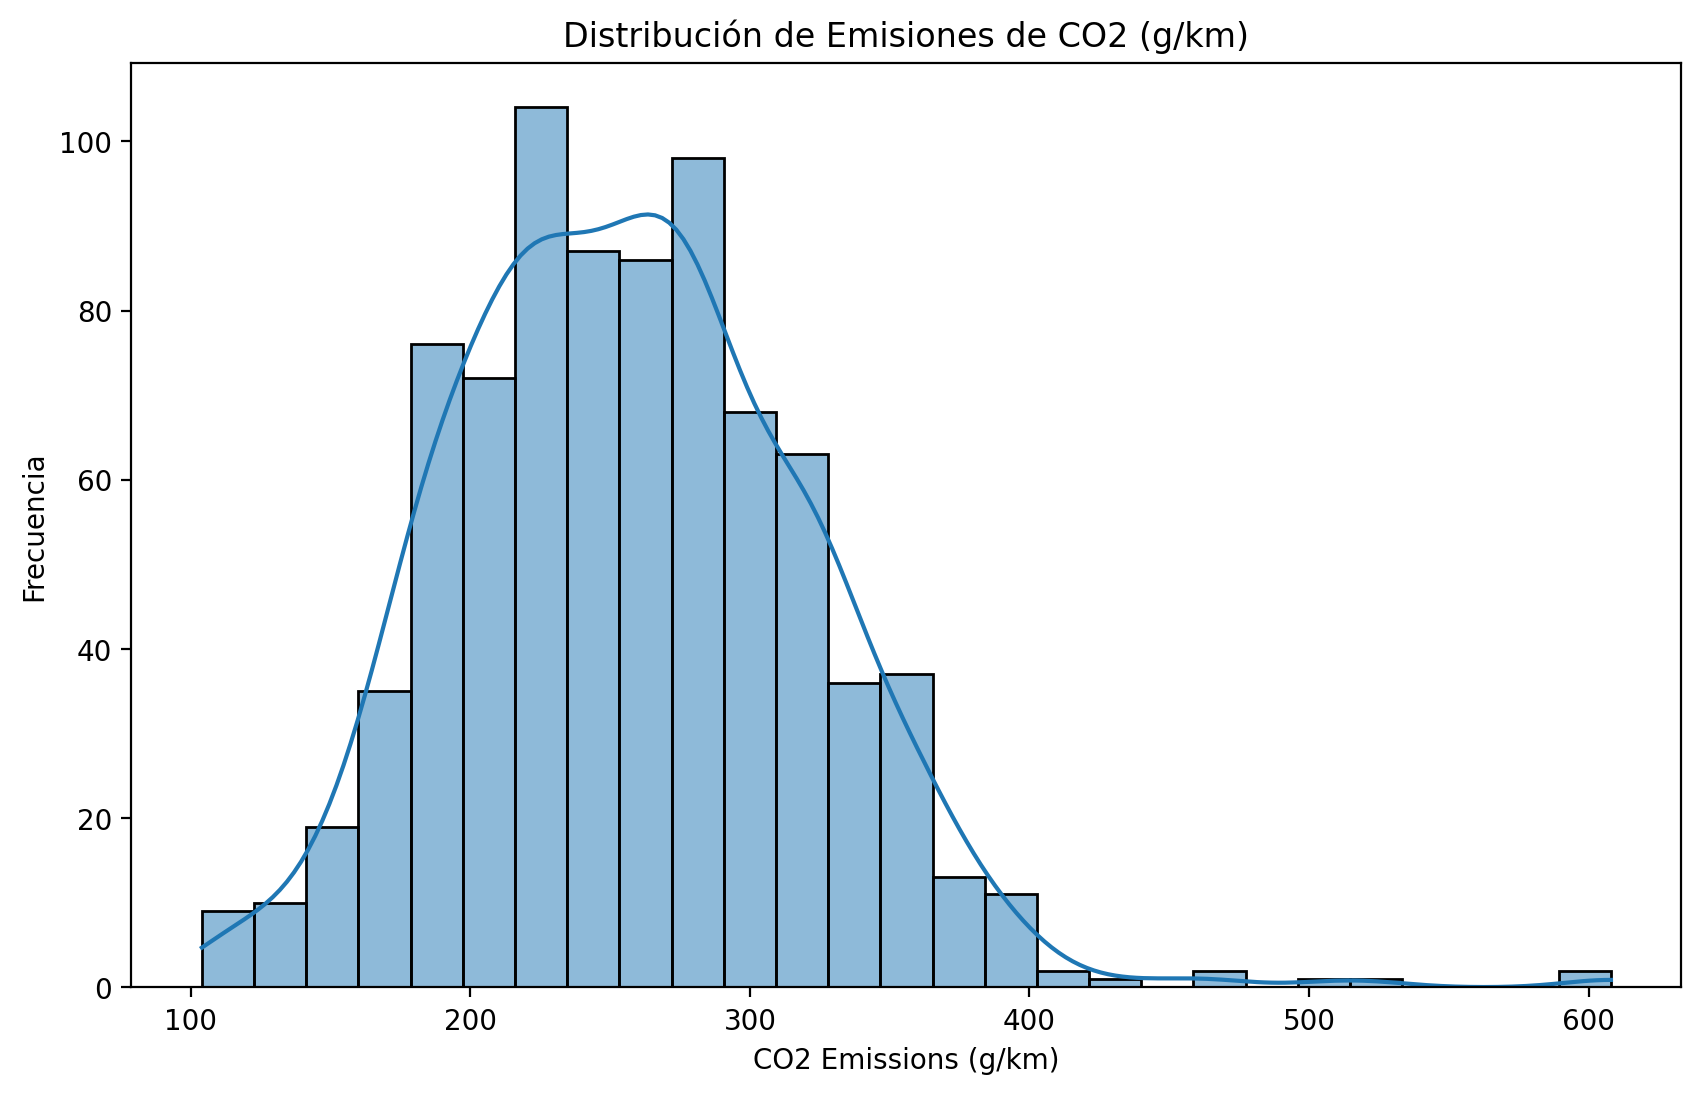

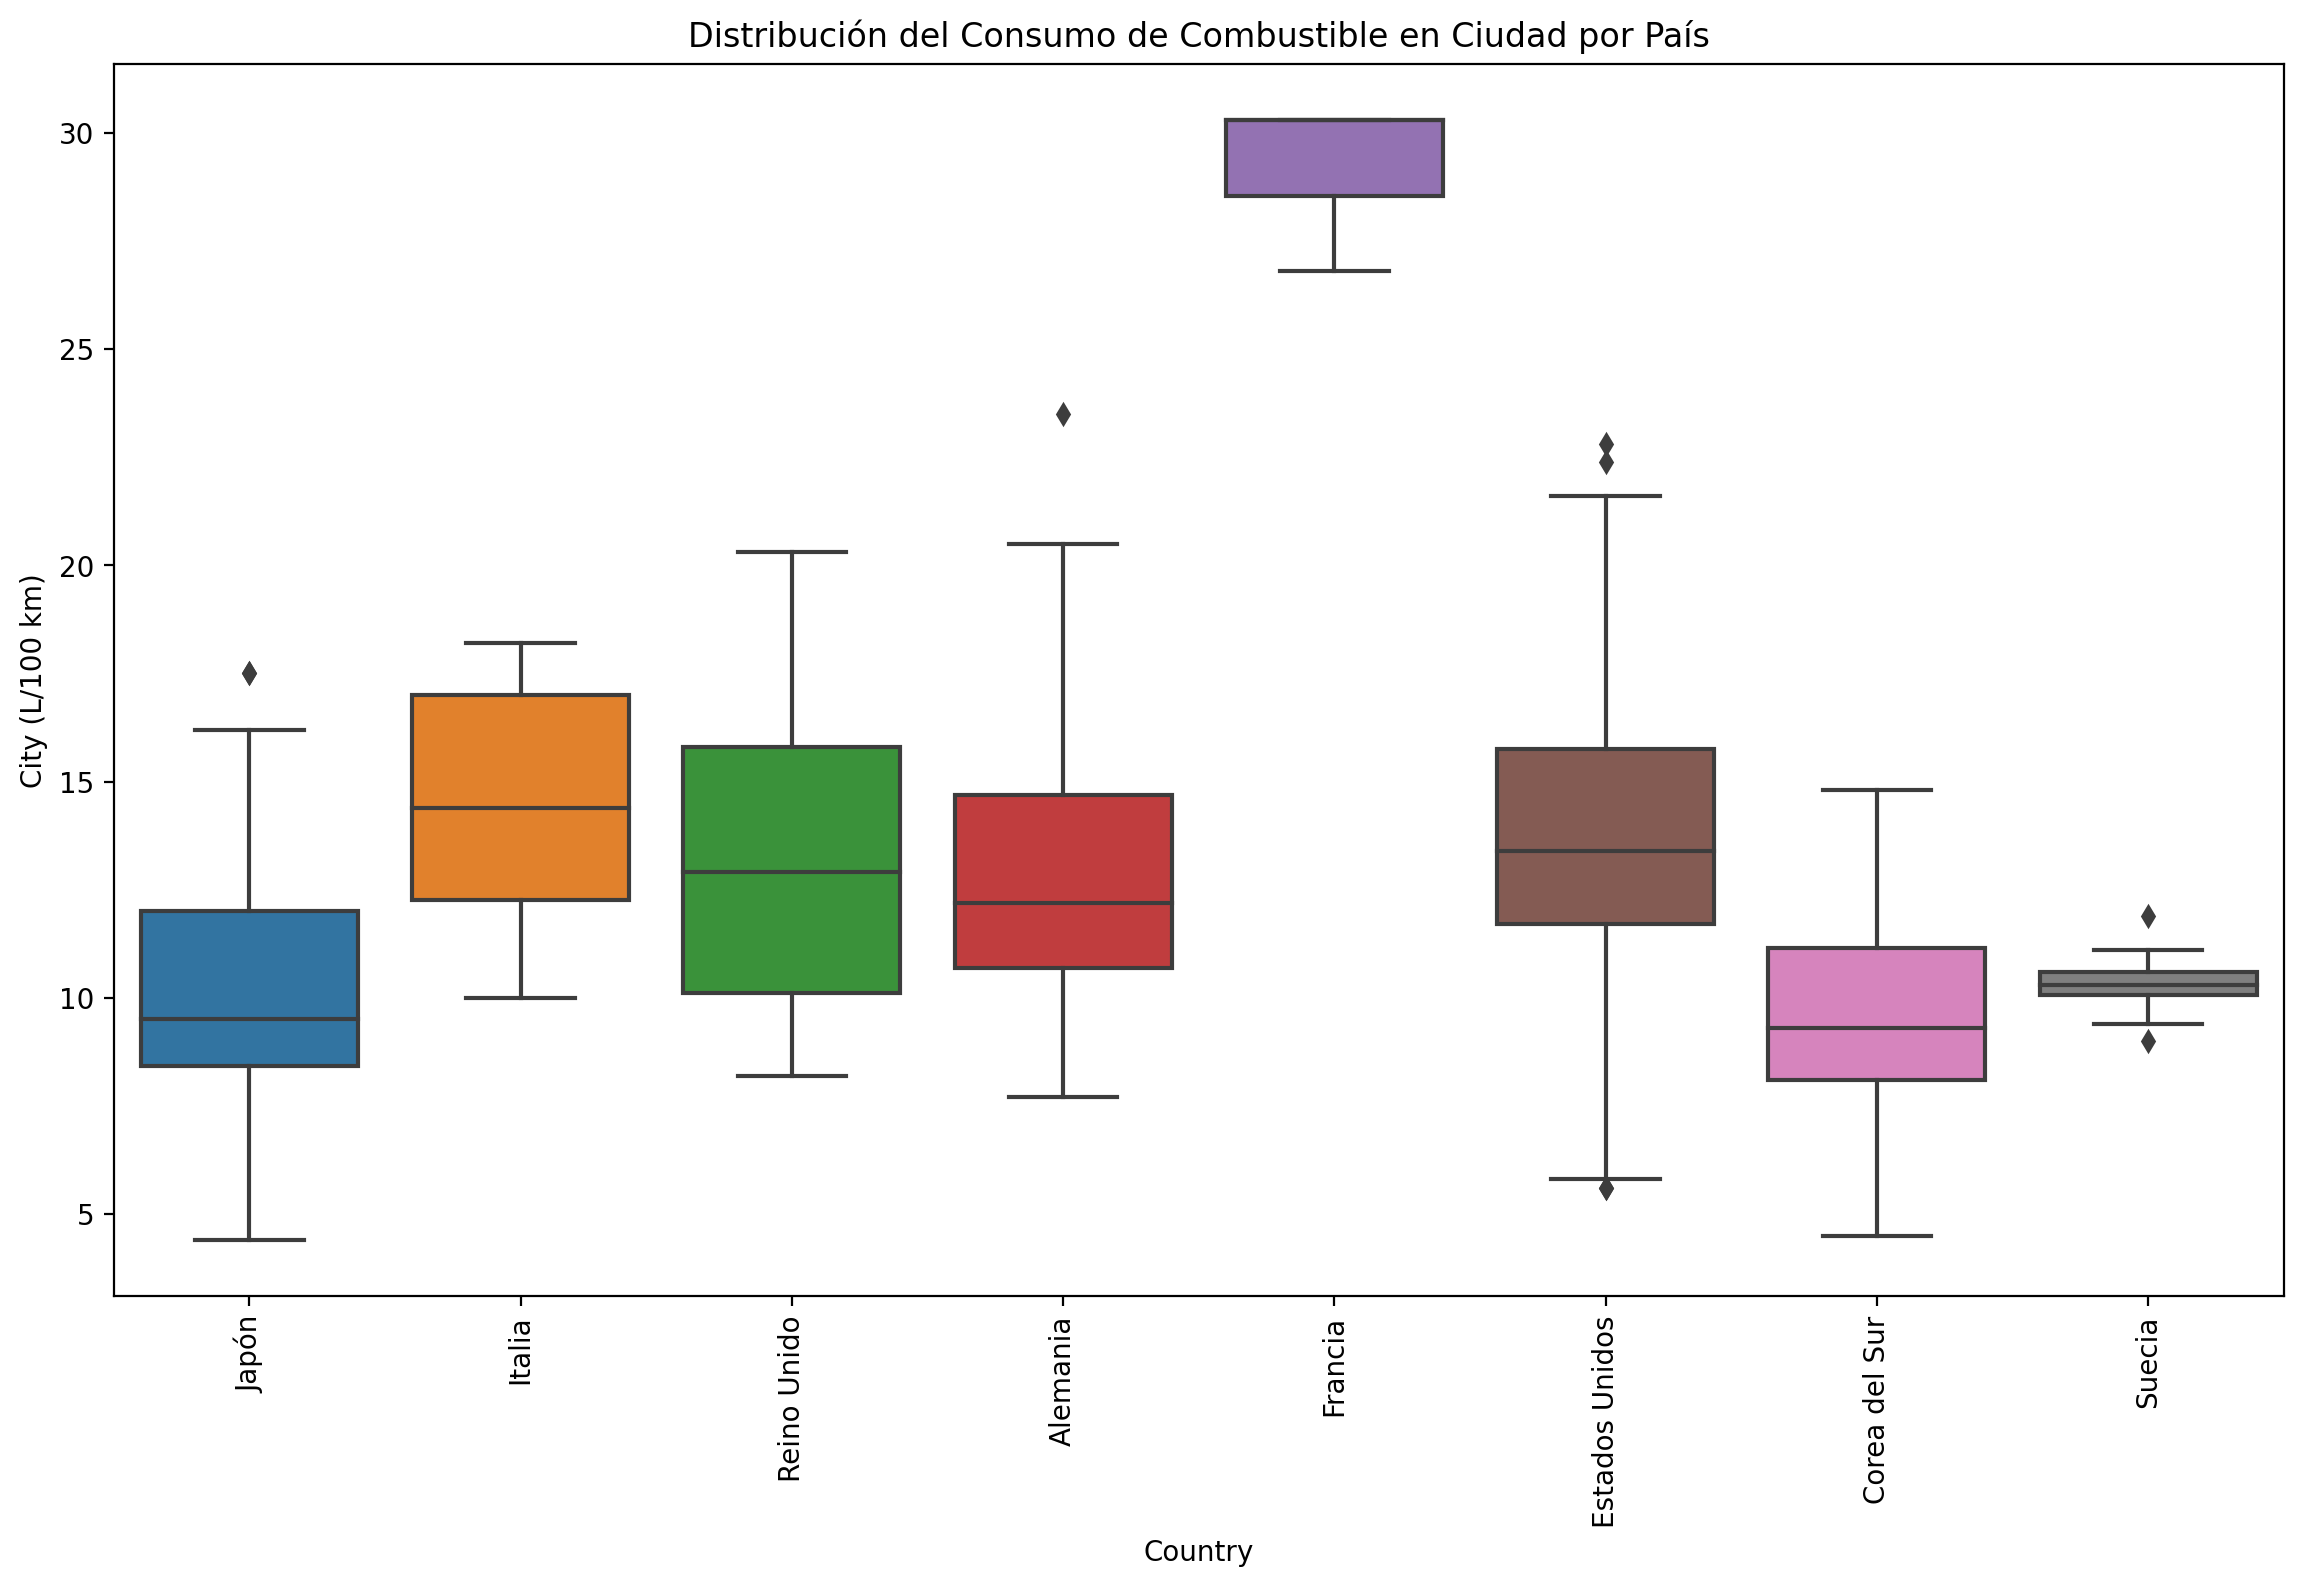

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV
# Obtener estadísticas descriptivas
descriptive_stats = df.describe()
print(descriptive_stats)

# Generar un histograma de una columna específica, por ejemplo, 'City (L/100 km)'
plt.figure(figsize=(10, 6))
sns.histplot(df['City (L/100 km)'], kde=True)
plt.title('Distribución del Consumo de Combustible en Ciudad (L/100 km)')
plt.xlabel('City (L/100 km)')
plt.ylabel('Frecuencia')
plt.show()

# Generar un histograma de una columna específica, por ejemplo, 'Highway (L/100 km)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Highway (L/100 km)'], kde=True)
plt.title('Distribución del Consumo de Combustible en Carretera (L/100 km)')
plt.xlabel('Highway (L/100 km)')
plt.ylabel('Frecuencia')
plt.show()

# Generar un histograma de una columna específica, por ejemplo, 'Combined (L/100 km)'
plt.figure(figsize=(10, 6))
sns.histplot(df['Combined (L/100 km)'], kde=True)
plt.title('Distribución del Consumo de Combustible Combinado (L/100 km)')
plt.xlabel('Combined (L/100 km)')
plt.ylabel('Frecuencia')
plt.show()

# Generar un histograma de una columna específica, por ejemplo, 'CO2 Emissions (g/km)'
plt.figure(figsize=(10, 6))
sns.histplot(df['CO2 emissions (g/km)'], kde=True)
plt.title('Distribución de Emisiones de CO2 (g/km)')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frecuencia')
plt.show()


# Generar un boxplot comparando el consumo de combustible en ciudad por país
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Country', y='City (L/100 km)')
plt.xticks(rotation=90)
plt.title('Distribución del Consumo de Combustible en Ciudad por País')
plt.xlabel('Country')
plt.ylabel('City (L/100 km)')
plt.show()

### 1.2 Emisiones de CO2 Y Tipos de combustible

In [7]:
# @title 1.2.1 Tipos de combustible por pais { display-mode: "form" }
# @markdown X -> Gasolina Regular\
# @markdown Z -> Gasolina Premium\
# @markdown D -> Diésel\
# @markdown E -> E85\
# @markdown B -> Electricidad\
# @markdown N -> Gas Natural\
# @markdown [Fuente](https://natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/personal-vehicles/choosing-right-vehicle/buying-electric-vehicle/understanding-the-tables/21383)


# Tabla de frecuencias de combustible por país
frecuencias_combustible_pais = df.groupby(['Country', 'Fuel type']).size().unstack(fill_value=0).sort_values(by='Country', ascending=True)

table = Table(title="[u]Frecuencias de Combustible por País[/u]", box=box.SQUARE)
table.add_column("País", justify="left", style="cyan", no_wrap=True)
table.add_column("Gasolina Regular", justify="left", style="green", no_wrap=True)
table.add_column("Gasolina Premium", justify="left", style="green", no_wrap=True)
table.add_column("Diesel", justify="left", style="yellow", no_wrap=True)
table.add_column("E85", justify="left", style="yellow", no_wrap=True)
table.add_column("Total", justify="left", style="bold", no_wrap=True)

for country, row in frecuencias_combustible_pais.iterrows():
    table.add_row(
        country,
        str(row['X']),
        str(row['Z']),
        str(row['D']),
        str(row['E']),
        str(row.sum()),
    )

# add total to footer
table.add_section()

table.add_row(
    "Total",
    str(frecuencias_combustible_pais['X'].sum()),
    str(frecuencias_combustible_pais['Z'].sum()),
    str(frecuencias_combustible_pais['D'].sum()),
    str(frecuencias_combustible_pais['E'].sum()),
    str(frecuencias_combustible_pais.sum().sum()),
    style="bold",
)

print(table)


                      Frecuencias de Combustible por País                      
┌────────────────┬──────────────────┬──────────────────┬────────┬─────┬───────┐
│ País           │ Gasolina Regular │ Gasolina Premium │ Diesel │ E85 │ Total │
├────────────────┼──────────────────┼──────────────────┼────────┼─────┼───────┤
│ Alemania       │ 22               │ 152              │ 0      │ 0   │ 174   │
│ Corea del Sur  │ 42               │ 13               │ 0      │ 0   │ 55    │
│ Estados Unidos │ 198              │ 62               │ 20     │ 15  │ 295   │
│ Francia        │ 0                │ 3                │ 0      │ 0   │ 3     │
│ Italia         │ 2                │ 29               │ 0      │ 0   │ 31    │
│ Japón          │ 126              │ 56               │ 0      │ 0   │ 182   │
│ Reino Unido    │ 0                │ 81               │ 0      │ 0   │ 81    │
│ Suecia         │ 0                │ 12               │ 0      │ 0   │ 12    │
├────────────────┼──────────────────┼──────────────────┼────────┼─────┼───────┤
│ Total          │ 390              │ 408              │ 20     │ 15  │ 833   │
└────────────────┴──────────────────┴──────────────────┴────────┴─────┴───────┘

En la muestra apenas aparecen vehículos que utilizen diesel o E85. La mayoría de los vehículos utilizan gasolina regular o premium y tienen una frecuencia similar (390 y 408), por lo que solo trabajaremos con estos dos tipos de combustible.

<Figure size 1000x600 with 0 Axes>

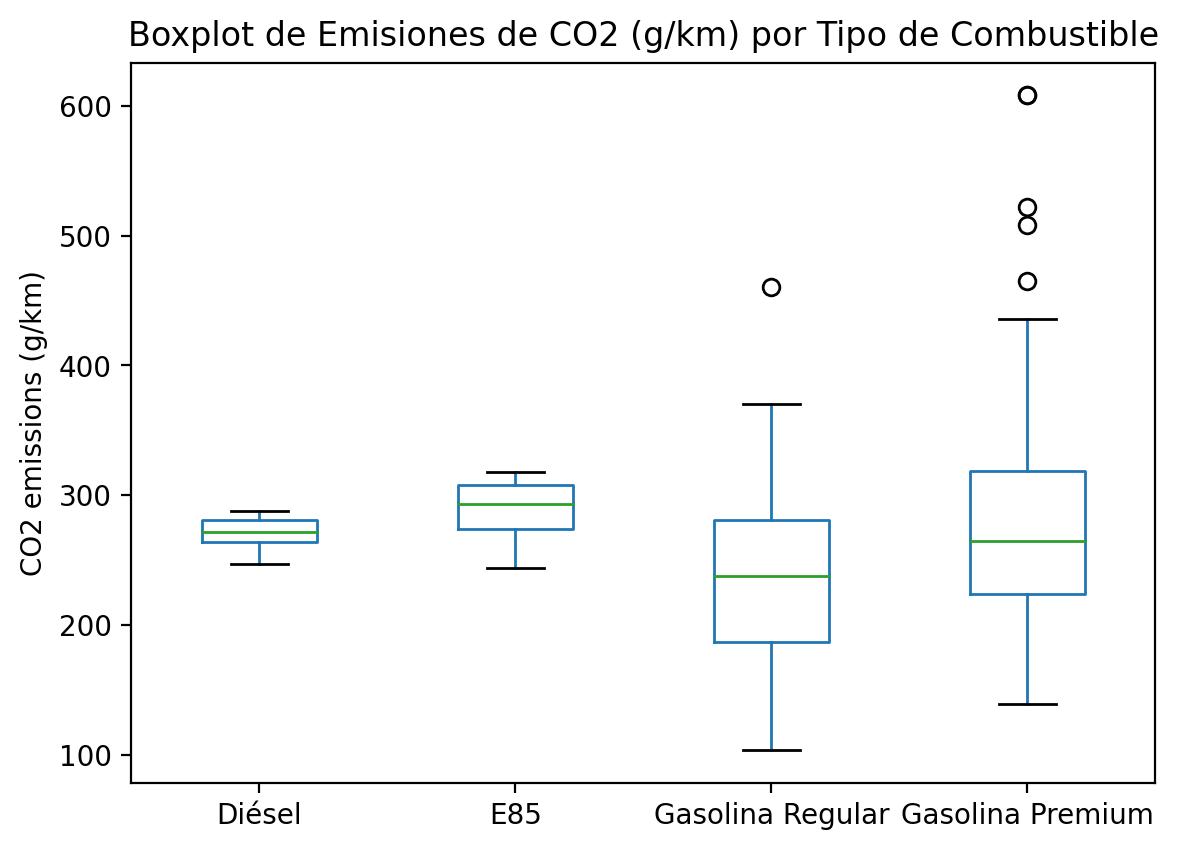

In [8]:
# @title 1.2.2 Emisiones de CO2 por cada tipo de combustible { display-mode: "form" }
# @markdown

fuel_types = {
    "X": "Gasolina Regular",
    "Z": "Gasolina Premium",
    "D": "Diésel",
    "E": "E85",
}

# Boxplot de Emisiones de CO2 (g/km) por Tipo de Combustible
plt.figure(figsize=(10, 6))
df.boxplot(column='CO2 emissions (g/km)', by='Fuel type', grid=False)
plt.xticks(ticks=np.arange(1, 5), labels=[fuel_types[fuel] for fuel in np.sort(df['Fuel type'].unique())])
plt.title('Boxplot de Emisiones de CO2 (g/km) por Tipo de Combustible')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('')
plt.ylabel('CO2 emissions (g/km)')
plt.show()



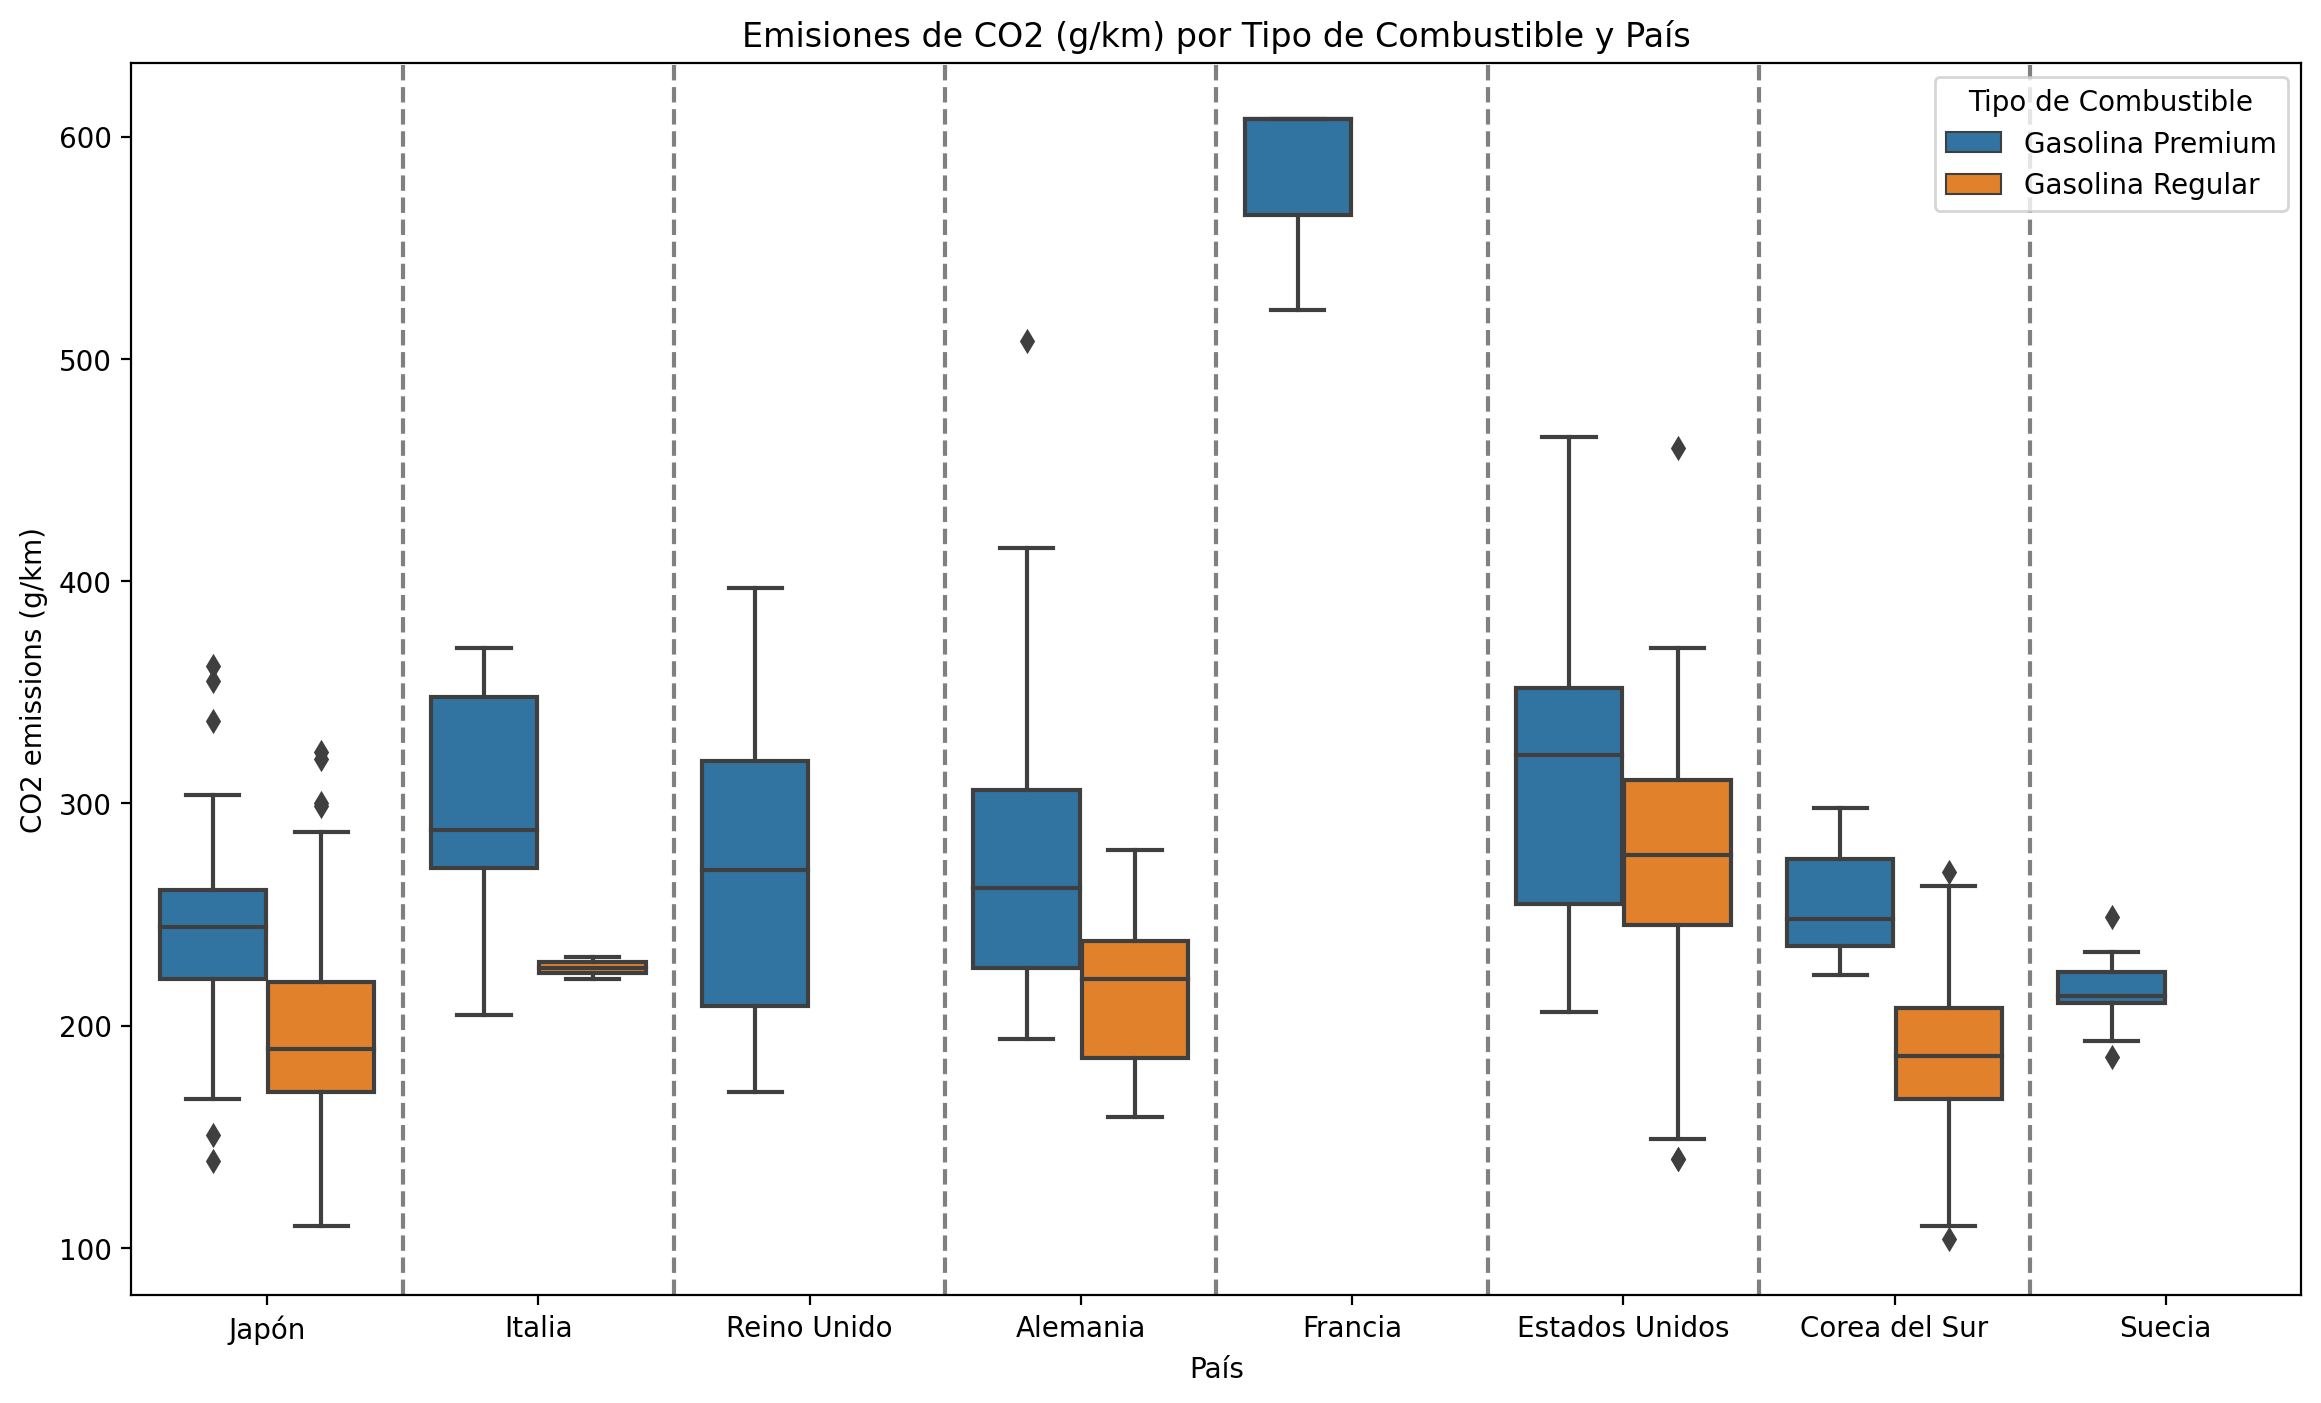

In [9]:
# @title 1.2.3 Emisiones de CO2 por tipo de combustible y pais { display-mode: "form" }
# @markdown

# Emisiones de CO2 (g/km) por tipo de combustible y país (solo X y Z)
# Añadir una raya vertical para separar cada país
# En la leyenda debe de aparecer el nombre del combustible, no el código (X -> Gasolina Regular, Z -> Gasolina Premium)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['Fuel type'].isin(['X', 'Z'])], x='Country', y='CO2 emissions (g/km)', hue='Fuel type')

plt.title('Emisiones de CO2 (g/km) por Tipo de Combustible y País')
plt.xlabel('País')
plt.ylabel('CO2 emissions (g/km)')
legend = plt.legend(title='Tipo de Combustible', loc='upper right')
for text in legend.get_texts():
    text.set_text(fuel_types[text.get_text()]) # Reemplazar el código por el nombre del combustible

# Añadir una raya vertical tras cada pais para separar cada país
for i in range(1, len(df['Country'].unique())):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--')

plt.xticks()
plt.show()


En este gráfico se puede apreciar como los vehiculos con gasolina premium emiten ligéramente más CO2 que los vehículos con gasolina regular. Se puede apreciar un valor atípico en los vehículos con Gasolina Premium en Francia que emiten considerablemente más CO2 que el resto de vehículos.

In [10]:
# @title 1.2.4 Vehiculos en Francia { display-mode: "form" }
# @markdown En francia solo hay 3 vehiculos que corresponden a vehiculos de muy alta gama, y que presentan un consumo y unas emisiones de CO2 muy superiores al resto de vehículos.\
# @markdown Esto explica el valor atípico en el gráfico anterior.

# Ver los vehiculos franceses, su tipo de combustible, consumo, emisiones
df_francia = df[df['Country'] == 'Francia'][['Make', 'Model', 'Fuel type', 'City (L/100 km)', 'Highway (L/100 km)', 'Combined (L/100 km)', 'CO2 emissions (g/km)']]
df_francia


,Make,Model,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),CO2 emissions (g/km)
128,Bugatti,Chiron,Z,26.8,16.6,22.2,522
129,Bugatti,Chiron Pur Sport,Z,30.3,20.9,26.1,608
130,Bugatti,Chiron Super Sport,Z,30.3,20.9,26.1,608


En francia solo hay 3 vehiculos que corresponden a vehiculos de muy alta gama, y que presentan un consumo y unas emisiones de CO2 muy superiores al resto de vehículos.  
Esto explica el valor atípico en el gráfico anterior.

### 1.3 Otros

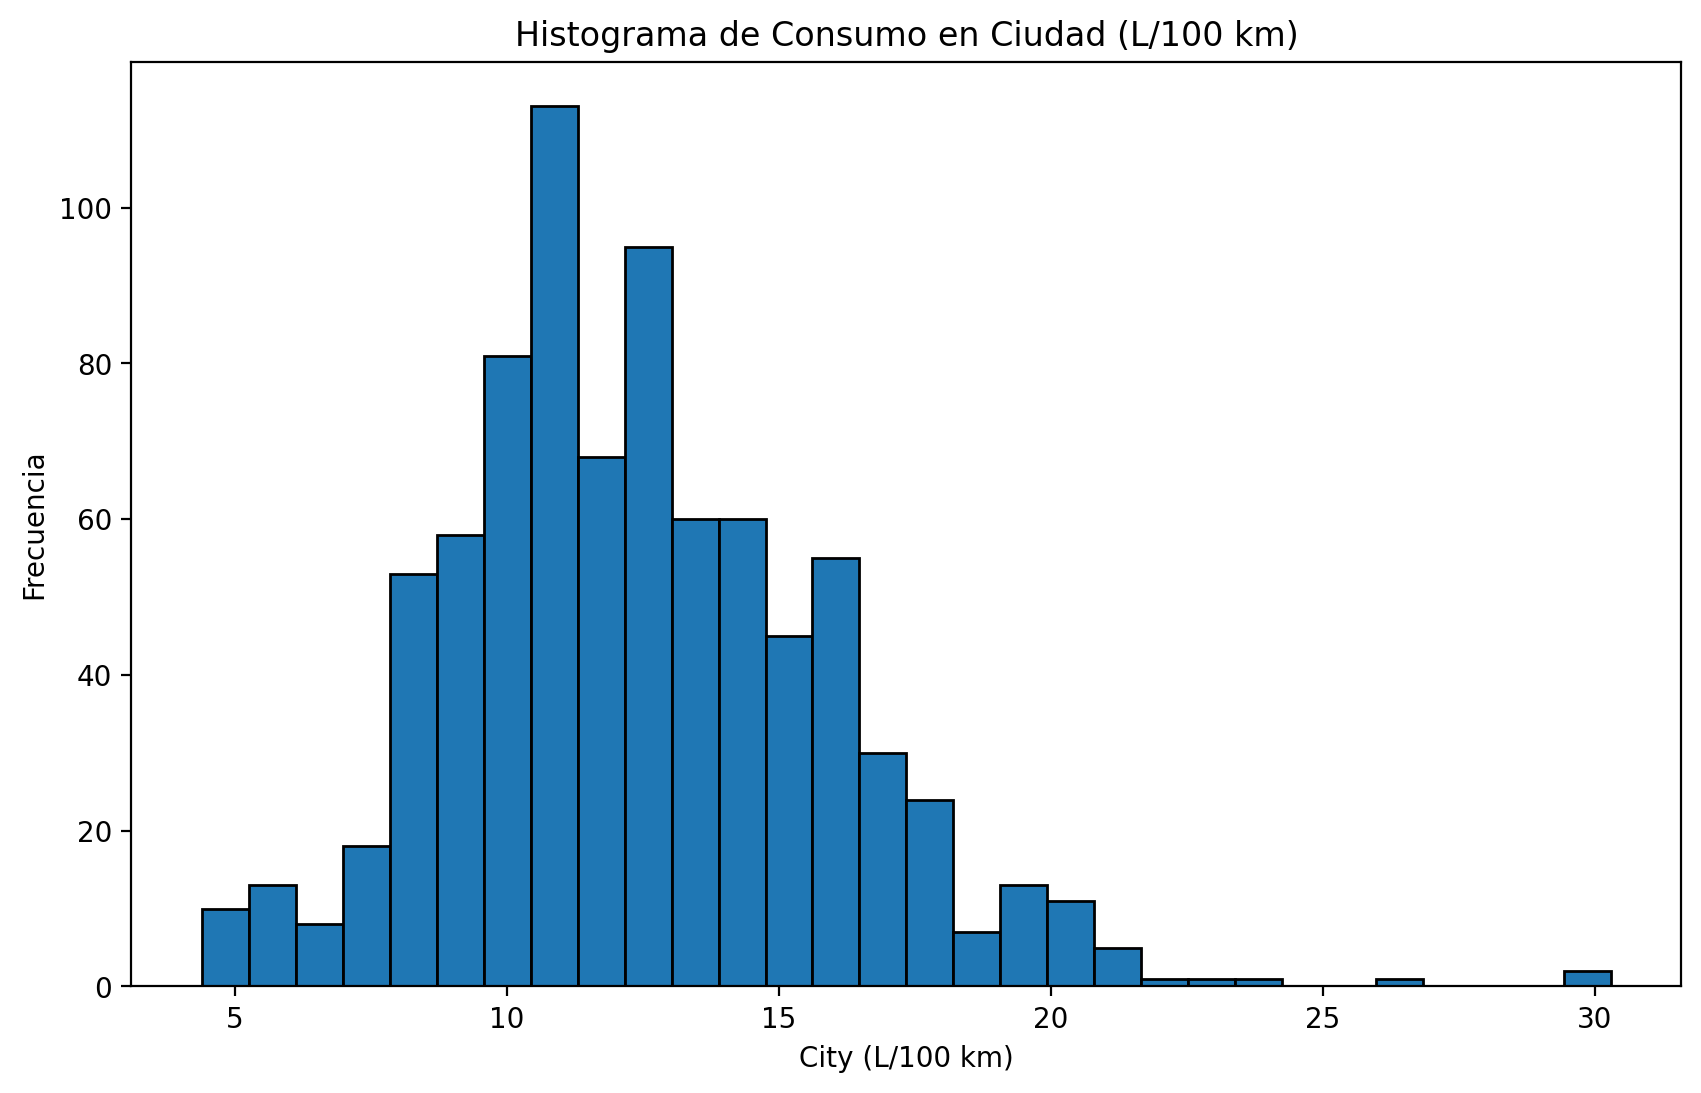

In [11]:


# Histograma de Consumo en Ciudad (L/100 km)
plt.figure(figsize=(10, 6))
df["City (L/100 km)"].hist(bins=30, edgecolor="black")
# x axis label mapping fuel type code to label
plt.title("Histograma de Consumo en Ciudad (L/100 km)")
plt.xlabel("City (L/100 km)")
plt.ylabel("Frecuencia")
plt.grid(False)
plt.show()

## 2. Inferencia Estadística

### 2.1 Estudio del tipo de combustible

In [12]:
# @title 2.1.1 Muestra de datos { display-mode: "form" }
# @markdown

# Tipos de combustible
fuel_types_values = df["Fuel type"].unique()


# https://natural-resources.canada.ca/energy-efficiency/transportation-alternative-fuels/personal-vehicles/choosing-right-vehicle/buying-electric-vehicle/understanding-the-tables/21383
fuel_types = {
        "X": "Gasolina Regular",
        "Z": "Gasolina Premium",
        "D": "Diésel",
        "E": "E85",
        "B": "Electricidad",
        "N": "Gas Natural",
}

table = Table(title="[u]Tamaño de muestra por tipo de combustible[/u]", box=box.HEAVY, show_header=False)

for fuel in fuel_types_values:
    table.add_row(
        f"{fuel_types[fuel]} ({fuel})",
        f"{df[df['Fuel type'] == fuel].shape[0]} elementos"
    )

print(table)



     Tamaño de muestra por tipo de      
              combustible               
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Gasolina Premium (Z) ┃ 408 elementos ┃
┃ Gasolina Regular (X) ┃ 390 elementos ┃
┃ Diésel (D)           ┃ 20 elementos  ┃
┃ E85 (E)              ┃ 15 elementos  ┃
┗━━━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━━━━┛

In [13]:
# @title 2.1.2 Diferencia de medias { display-mode: "form" }
# @markdown Comparación de medias de distintos tipos de metricas para los combustibles **Gasolina Regular** y **Gasolina Premium** mediante intervalo de confianza\
# @markdown ¿Se puede afirmar que hay **diferencia** entre las **emisiones de CO2**, El **consumo en Ciudad** y **en Autopista** entre los **2 tipos de combustible**?
# @markdown \begin{array}{llllllllll}
# @markdown \mu_x-\mu_z=\mu_d                       \\
# @markdown H0\equiv\mu_x=\mu_z\rightarrow\mu_d=0   \\
# @markdown H1\equiv\mu_x=\mu_z\rightarrow\mu_d\ne0 \\
# @markdown \\
# @markdown Sd=\sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}} \\
# @markdown t_{\alpha/2, n-1} \\
# @markdown IC = \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{Sd}{\sqrt{n}} \\
# @markdown \end{array}


# \begin{array}{llllllllll}
# 	\mu_x-\mu_z=\mu_d                       \\
# 	H0\equiv\mu_x=\mu_z\rightarrow\mu_d=0   \\
# 	H1\equiv\mu_x=\mu_z\rightarrow\mu_d\ne0 \\
#   \\
#   Sd=\sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}} \\
#   t_{\alpha/2, n-1} \\
#   IC = \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{Sd}{\sqrt{n}} \\
# \end{array}

metric_descriptions = {
    "CO2 emissions (g/km)": "Emisiones de CO2 (g/km)",
    "City (L/100 km)": "Consumo de Combustible en Ciudad (L/100 km)",
    "Highway (L/100 km)": "Consumo de Combustible en Carretera (L/100 km)",
    "Combined (L/100 km)": "Consumo de Combustible Combinado (L/100 km)",
}


metric = widgets.Dropdown(
    options=metric_descriptions.keys(),
    description="Métrica:",
    continuous_update=False,
)

alpha_value = widgets.FloatSlider(
    value=0.05,
    min=0.005,
    max=0.200,
    step=0.005,
    readout_format=".3f",
    description="Nivel de Significancia:",
    continuous_update=False,
)


def comparacion_medias(metric, alpha):
    # Comparar el consumo de combustible entre X y Z (Gasolina Regular y Gasolina Premium)
    fuel_types_df_X = df[(df["Fuel type"] == "X")][metric]
    fuel_types_df_Z = df[(df["Fuel type"] == "Z")][metric]
    n = min(len(fuel_types_df_X), len(fuel_types_df_Z))

    fuel_types_df_X = fuel_types_df_X.head(n)
    fuel_types_df_Z = fuel_types_df_Z.head(n)

    differences = fuel_types_df_X.values - fuel_types_df_Z.values

    mean_diff_X_Z = differences.mean()

    # sqrt(Cuasivarianza)
    Sd = np.sqrt(np.sum((differences - mean_diff_X_Z) ** 2) / (n - 1))

    # Latex cuasivarianza
    Sd_latex = r"\sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}}"

    # print latex
    print(f"Cuasivarianza: {Sd_latex}")


    # t student para n-1 grados de libertad y alpha/2
    t = stats.t.ppf(1 - alpha / 2, n - 1)

    # Intervalo de confianza para la diferencia de medias
    IC = (mean_diff_X_Z - t * Sd / np.sqrt(n), mean_diff_X_Z + t * Sd / np.sqrt(n))

    results = f"""[b u]Comparación de Medias[/b u] de [b]{metric_descriptions[metric]}[/b] entre [b]Gasolina Regular (X)[/b] y [b]Gasolina Premium (Z)[/b] para {n} muestras:
[b red]H0[/b red]: µ_X = µ_Z => µ_X - µ_Z = µ_d = 0
[b red]H1[/b red]: µ_X ≠ µ_Z => µ_X - µ_Z = µ_d ≠ 0

Media de la diferencia entre X y Z (µ_d): {round(mean_diff_X_Z, 4)}
Desviación estándar de µ_d: {round(Sd, 4)}
Valor crítico de t para n-1 ({n-1}) grados de libertad y alpha/2 ({round(alpha/2, 4)}): {round(t, 4)}
Error estándar de la diferencia entre X y Z: ±{round(t * Sd / np.sqrt(n), 4)}

[b u]Intervalo de Confianza (al {1-alpha:.0%}) para la diferencia de medias[/b u]
IC: [u]{round(IC[0], 4)}[/u] <= µ_d <= [u]{round(IC[1], 4)}[/u]


[b u]Resultados del Test de Hipótesis[/b u]  """
    print(results)

    if IC[0] <= 0 <= IC[1]:
        print(
            f":white_check_mark: Se puede suponer que la media de {metric_descriptions[metric]} entre Gasolina Regular y Gasolina Premium es [b u]igual[/b u] (µ_d = 0) ([b u]no se rechaza H0[/b u])"
        )
    else:
        print(
            f":x: Se puede suponer que la media de {metric_descriptions[metric]} entre Gasolina Regular y Gasolina Premium es [b u]diferente[/b u] (µ_d ≠ 0) ([b u]se rechaza H0[/b u])"
        )

    # Plot del intervalo de confianza sobre el histograma de las diferencias (los bins que quedan fuera del intervalo se pintan mas oscuros)
    plt.figure(figsize=(10, 6))
    sns.histplot(differences, kde=True)
    plt.title(
        "Distribución de la Diferencia de Medias entre Gasolina Regular y Gasolina Premium"
    )
    plt.xlabel("Diferencia de Medias")
    plt.ylabel("Frecuencia")

    plt.axvline(IC[0], color="r", linestyle="--", label="Límite Inferior IC")
    plt.axvline(
        mean_diff_X_Z,
        color="forestgreen",
        linestyle="-",
        label="Media de la Diferencia",
    )
    plt.axvline(IC[1], color="r", linestyle="--", label="Límite Superior IC")
    plt.axvspan(IC[0], IC[1], color="orange", alpha=0.1)

    # Colors: https://matplotlib.org/stable/gallery/color/named_colors.html
    plt.axvline(0, color="b", linestyle="-", label="µ_d = 0 (H0)")

    plt.legend()
    plt.show()


_ = interact(
    comparacion_medias,
    alpha=alpha_value,
    metric=metric,
)

interactive(children=(Dropdown(description='Métrica:', options=('CO2 emissions (g/km)', 'City (L/100 km)', 'Hi…

In [14]:
# @title 2.1.2 Contraste de Hipotesis Diferencia de Medias { vertical-output: true, display-mode: "form" }
# @markdown Vamos a realizar un nuevo contraste de hipótesis para determinar si las emisiones de CO2 son mayores en vehículos que utilizan **Gasolina Premium** en comparación con los que utilizan **Gasolina Regular**.

# @markdown \begin{array}{llllllllll}
# @markdown H0\equiv\mu_{Premium} <= \mu_{Regular} \rightarrow \mu_{Premium} - \mu_{Regular} \le 0 \\
# @markdown H1\equiv\mu_{Premium} > \mu_{Regular} \rightarrow \mu_{Premium} - \mu_{Regular} > 0 \\
# @markdown \\
# @markdown T = \frac{\bar{x}_{Premium} - \space \bar{x}_{Regular}}{\sqrt{\frac{Sd_{Premium}^2}{n_{Premium}} + \frac{Sd_{Regular}^2}{n_{Regular}}}} \\
# @markdown v = \frac{(\frac{Sd_{Regular}^2}{n_{Regular}} + \frac{Sd_{Premium}^2}{n_{Premium}})^2}{\frac{(\frac{Sd_{Regular}^2}{n_{Regular}})^2} {n_{Regular} - 1} + \frac{(\frac{Sd_{Premium}^2}{n_{Premium}})^2 } {n_{Premium} - 1}} \\
# @markdown IC = (\bar{x}_{Premium} - \space \bar{x}_{Regular}) \pm t_{\alpha, v} \cdot \sqrt{\frac{Sd_{Premium}^2}{n_{Premium}} + \frac{Sd_{Regular}^2}{n_{Regular}}} \\
# @markdown \end{array}

# \begin{array}{llllllllll}
# 	\mu_x-\mu_z=\mu_d                       \\
# 	H0\equiv\mu_x=\mu_z\rightarrow\mu_d=0   \\
# 	H1\equiv\mu_x=\mu_z\rightarrow\mu_d\ne0 \\
#   \\
#   Sd=\sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n-1}} \\
#   t_{\alpha/2, n-1} \\
#   IC = \bar{x} \pm t_{\alpha/2, n-1} \cdot \frac{Sd}{\sqrt{n}} \\
# \end{array}

metric_descriptions = {
    "CO2 emissions (g/km)": "Emisiones de CO2 (g/km)",
    "City (L/100 km)": "Consumo de Combustible en Ciudad (L/100 km)",
    "Highway (L/100 km)": "Consumo de Combustible en Carretera (L/100 km)",
    "Combined (L/100 km)": "Consumo de Combustible Combinado (L/100 km)",
}


alpha_value = widgets.FloatSlider(
    value=0.05,
    min=0.005,
    max=0.200,
    step=0.005,
    readout_format=".3f",
    description="Nivel de Significancia:",
    continuous_update=False,
)

df_filtered_premium = df[df["Fuel type"] == "Z"]
df_filtered_regular = df[df["Fuel type"] == "X"]

metric = "CO2 emissions (g/km)"
# Comparar el consumo de combustible entre X y Z (Gasolina Regular y Gasolina Premium)
# regular
fuel_types_df_regular = df_filtered_regular[metric]
# premium
fuel_types_df_premium = df_filtered_premium[metric]

# Calcular estadísticas muestrales
mean_regular = fuel_types_df_regular.mean()
mean_premium = fuel_types_df_premium.mean()
std_regular = fuel_types_df_regular.std(ddof=1)
std_premium = fuel_types_df_premium.std(ddof=1)
n_regular = len(fuel_types_df_regular)
m_premium = len(fuel_types_df_premium)


def comparacion_medias(alpha):

    mean_diff_X_Z = mean_premium - mean_regular

    # Calcular el estadístico T
    t_stat = (mean_diff_X_Z) / np.sqrt(
        (std_premium**2 / m_premium) + (std_regular**2 / n_regular)
    )

    # Calcular los grados de libertad
    numerador = (std_regular**2 / n_regular + std_premium**2 / m_premium) ** 2
    denominador = ((std_regular**2 / n_regular) ** 2 / (n_regular - 1)) + (
        (std_premium**2 / m_premium) ** 2 / (m_premium - 1)
    )
    g_libertad = numerador / denominador

    # Valor crítico para un nivel de significancia de 0.05 (una cola)
    t_critical = stats.t.ppf(1 - alpha, g_libertad)

    # Resultado del contraste
    rechazar_h0 = abs(t_stat) > t_critical

    # Intervalo de confianza
    E = t_critical * np.sqrt(
        (std_regular**2 / n_regular) + (std_premium**2 / m_premium)
    )
    IC = (mean_diff_X_Z - E, mean_diff_X_Z + E)

    percent_confianza = round(100 - alpha * 100, 4)

    results = f"""[b u]Comparación de Medias[/b u] de [b]{metric_descriptions[metric]}[/b] entre [b]Gasolina Premium (Z)[/b] y [b]Gasolina Regular (X)[/b]:
[b red]H0[/b red]: µ_Z <= µ_X => µ_Z - µ_X <= 0
[b red]H1[/b red]: µ_Z > µ_X => µ_Z - µ_X > 0

Media de {metric_descriptions[metric]} para Gasolina Regular (X): {round(mean_regular, 4)}
Media de {metric_descriptions[metric]} para Gasolina Premium (Z): {round(mean_premium, 4)}
Número de muestras para Gasolina Regular (X): {n_regular}
Número de muestras para Gasolina Premium (Z): {m_premium}
Desviación estándar de {metric_descriptions[metric]} para Gasolina Regular (X): {round(std_regular, 4)}
Desviación estándar de {metric_descriptions[metric]} para Gasolina Premium (Z): {round(std_premium, 4)}
T: {round(t_stat, 4)}
Grados de libertad: {round(g_libertad, 4)}
Valor crítico de t para un nivel de significancia de {round(alpha, 4)} y {round(g_libertad, 4)} grados de libertad: {round(t_critical, 4)}

[b u]Resultados del Test de Hipótesis[/b u]  """

    print(results)

    if not rechazar_h0:
        print(
            f":white_check_mark: {round(t_stat, 4)} <= {round(t_critical, 4)}: Se puede suponer que las emisiones de CO2 son [b u]menores o iguales[/b u] en vehículos que utilizan Gasolina Premium en comparación con los que utilizan Gasolina Regular ([b u]no se rechaza H0[/b u])"
        )
    else:
        print(
            f":x: {round(t_stat, 4)} > {round(t_critical, 4)}: Se puede suponer que las emisiones de CO2 son [b u]mayores[/b u] en vehículos que utilizan Gasolina Premium en comparación con los que utilizan Gasolina Regular ([b u]se rechaza H0[/b u])"
        )

    print(
        f"""[b u]Intervalo de Confianza al {percent_confianza:.1f}%[/b u]: {round(IC[0], 4)} <= µ_Z - µ_X <= {round(IC[1], 4)}
Esto indica que, con un {percent_confianza:.1f}% de confianza, los vehiculos que utilizan Gasolina Premium emiten entre [u]{round(IC[0], 4)} g/km[/u] y [u]{round(IC[1], 4)} g/km[/u] más de CO2 en comparación con los que utilizan Gasolina Regular."""
    )

    # Plot del intervalo de confianza sobre el histograma de las diferencias (los bins que quedan fuera del intervalo se pintan mas oscuros)
    plt.figure(figsize=(10, 6))
    sns.histplot(
        fuel_types_df_premium, color="moccasin", alpha=1, label="Gasolina Premium"
    )
    sns.histplot(
        fuel_types_df_regular, color="lightblue", alpha=1, label="Gasolina Regular"
    )
    plt.title(
        f"Distribución de {metric_descriptions[metric]} entre Gasolina Regular y Gasolina Premium"
    )
    plt.axvline(
        mean_premium,
        color="goldenrod",
        linestyle="-",
        label="Media Gasolina Premium",
        linewidth=2,
    )
    plt.axvline(
        mean_regular,
        color="blueviolet",
        linestyle="-",
        label="Media Gasolina Regular",
        linewidth=2,
    )

    plt.axvline((mean_regular + mean_premium) / 2, color="red", linestyle="-", label="")
    plt.axvline(
        (mean_regular + mean_premium) / 2 + E,
        color="orangered",
        linestyle="-",
        label="Límite Superior IC",
    )
    plt.axvline(
        (mean_regular + mean_premium) / 2 - E,
        color="orangered",
        linestyle="-",
        label="Límite Inferior IC",
    )
    plt.axvspan(
        (mean_regular + mean_premium) / 2 - E,
        (mean_regular + mean_premium) / 2 + E,
        color="pink",
        alpha=0.75,
    )

    plt.xlabel(metric_descriptions[metric])
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()


_ = interact(
    comparacion_medias,
    alpha=alpha_value,
)

interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='Nivel de Significancia:', …

### Prueba de bondad de Ajuste

In [19]:
distributions = {
    "Normal": stats.norm,
    "Exponencial": stats.expon,
    "Gamma": stats.gamma,
    "Beta": stats.beta,
    "Log-Normal": stats.lognorm,
    "Weibull": stats.weibull_min,
    "Chi-Cuadrado": stats.chi2,
    "T-Student": stats.t,
    "F-Snedecor": stats.f,
}

metric_descriptions = {
    "CO2 emissions (g/km)": "Emisiones de CO2 (g/km)",
    "City (L/100 km)": "Consumo de Combustible en Ciudad (L/100 km)",
    "Highway (L/100 km)": "Consumo de Combustible en Carretera (L/100 km)",
    "Combined (L/100 km)": "Consumo de Combustible Combinado (L/100 km)",
}

fuel_types = {
    "Todos los Tipos de Combustible": "All",
    "Gasolina Regular": "X",
    "Gasolina Premium": "Z",
    "Diésel": "D",
    "E85": "E",
}

metric = widgets.Dropdown(
    options=metric_descriptions.keys(),
    description="Métrica:",
    continuous_update=False,
)
fuel_type = widgets.Dropdown(
    options=fuel_types,
    description="Tipo de Combustible:",
    continuous_update=False,
    # display the fuel_type value instead of the key
)
distribution_sel = widgets.Dropdown(
    options=distributions.keys(),
    description="Distribución:",
    continuous_update=False,
)
alpha_value = widgets.FloatSlider(
    value=0.05,
    min=0.005,
    max=0.200,
    step=0.005,
    readout_format=".3f",
    description="Nivel de Significancia:",
    continuous_update=False,
)

# Checkboxes
show_differences = widgets.Checkbox(
    value=False,
    description="Mostrar Diferencias",
    disabled=False,
    indent=False,
)
show_expected = widgets.Checkbox(
    value=True,
    description="Mostrar Distribución Ajustada",
    disabled=False,
    indent=False,
)
show_histogram = widgets.Checkbox(
    value=True,
    description="Mostrar Histograma",
    disabled=False,
    indent=False,
)
show_observed = widgets.Checkbox(
    value=True,
    description="Mostrar Histograma de la Muestra",
    disabled=False,
    indent=False,
)


def bondad_ajuste(
    metric,
    fuel_type,
    distribution_str,
    alpha,
    show_differences,
    show_expected,
    show_histogram,
    show_observed,
):
    df_filtered = df
    if fuel_type != "All":
        df_filtered = df[df["Fuel type"] == fuel_type]
    distribution = distributions[distribution_str]
    # Obtener parámetros de la distribución
    params = distribution.fit(df_filtered[metric])

    # Realizar test de bondad de ajuste de chi-cuadrado de Pearson
    observed_freq, bins = np.histogram(df_filtered[metric], bins="auto")

    # print('Bins:', bins)
    expected_values = len(df_filtered[metric]) * (
        distribution.cdf(bins[1:], *params) - distribution.cdf(bins[:-1], *params)
    )

    # Prueba de bondad de ajuste para City (L/100 km)
    # H0: La muestra sigue una distribución Normal
    # H1: La muestra no sigue una distribución Normal


    # Prueba de bondad de ajuste
    diffs = []
    for i in range(len(observed_freq)):
        if expected_values[i] < 1:
            diffs.append(0)
            continue
        diffs.append(
            ((np.abs(observed_freq[i] - expected_values[i])) ** 2) / expected_values[i]
        )

    Z_alpha = stats.chi2.ppf(1 - alpha, len(observed_freq) - 1 - len(params))

    T_est = np.sum(diffs)

    p = 1 - stats.chi2.cdf(T_est, len(observed_freq) - 1 - len(params))

    # print(
    #     f"Resultados del Test de Bondad de Ajuste para la Distribución {distribution_str} con {np.sum(observed_freq)} observaciones:"
    # )
    results =f"""[b u]Prueba de Bondad de Ajuste[/b u] para la Distribución [b]{distribution_str}[/b] con [b]{np.sum(observed_freq)}[/b] observaciones:
[b red]H0[/b red]: La muestra sigue una distribución {distribution_str}
[b red]H1[/b red]: La muestra no sigue una distribución {distribution_str}

[bold underline]Resultados del Test de Bondad de Ajuste[/bold underline]
Parámetros estimados de la Distribución {distribution_str}: {[round(p, 4) for p in params]}

Estadístico de Prueba: {round(T_est, 4)}
Valor Crítico: {round(Z_alpha, 4)}

Valor P: {round(p, 4)}
Nivel de Significancia: {round(alpha,2)} ({(round(1-alpha,2))*100}% de confianza)  """

    print(results)

    # Latex hipotesis
    hipotesis_latex = r"\begin{array}{llllllllll} \text{H0:} & \text{La muestra sigue una distribución Normal} \\ \text{H1:} & \text{La muestra no sigue una distribución Normal} \end{array}"

    # Latex formulas
    T_est_latex = r"\sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i} = \sum_{i=1}^{n} \frac{(|O_i - E_i|)^2}{E_i}"
    # Distribucion normal latex
    distribution_normal_latex = r"O_i \sim N(E_i, E_i)"


    # Interpretación
    if T_est < Z_alpha:
        print(
            f":white_check_mark: La muestra parece seguir una distribución [b]{distribution_str}[/b] ([b u]no se rechaza H0[/b u])"
        )
    else:
        print(
            f":x: La muestra parece [u]no[/u] seguir una distribución [b]{distribution_str}[/b] ([b u]se rechaza H0[/b u])"
        )

    # Plot 2 figures:
    # 1. the distribution and the histogram
    # 2. Q-Q plot
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Plot the histogram calculated above (observed_freq, bins)


    # Histograma de la muestra
    if show_histogram:
        ax[0].hist(
            df_filtered[metric],
            bins=bins,
            color="b",
            alpha=0.5,
            label="Histograma de la Muestra",
        )

    # Curva del histograma de la muestra ajustada
    if show_observed:
        ax[0].plot(
            bins[:-1] + 0.5 * (bins[1] - bins[0]),
            observed_freq,
            "k--",
            linewidth=2,
            label="Curva del Histograma de la Muestra",
        )

    # Plot the diffs
    if show_differences:
        ax[0].bar(
            bins[:-1] + 0.5 * (bins[1] - bins[0]),
            diffs,
            width=bins[1] - bins[0],
            color="green",
            alpha=0.5,
            label="Diferencias",
            # Bottom is the minimum value of the observed_freq and expected_values on each bin
            bottom=np.minimum(observed_freq, expected_values),
        )
        ax[0].fill_between(
            bins[:-1] + 0.5 * (bins[1] - bins[0]),
            observed_freq,
            expected_values,
            color="gray",
            alpha=0.5,
            label="Diferencias",
        )

    # Curva del histograma de la muestra ajustada
    if show_expected:
        ax[0].plot(
            bins[:-1] + 0.5 * (bins[1] - bins[0]),
            expected_values,
            "r--",
            linewidth=2,
            label="Distribución Ajustada",
        )

    ax[0].set_title(
        f"Distribución de {metric_descriptions[metric]} y Ajuste a la Distribución {distribution_str}"
    )

    # vertical dashed line on each bin
    ax[0].grid(True, axis="x", linestyle="--")

    # ax[0].set_xticks(bins.round(2), rotation=45)
    ax[0].set(xticks=bins.round(2), xticklabels=bins.round(1), xlabel=metric, ylabel="Densidad")
    # rotate x labels
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45)
    # ax[0].set_xlabel(metric)
    # ax[0].set_ylabel("Densidad")
    ax[0].legend()

    # Q-Q plot
    if show_observed:
        stats.probplot(df_filtered[metric], dist=distribution, sparams=params, plot=ax[1])
        ax[1].set_title(f"Q-Q Plot de la Muestra con la Distribución {distribution_str}")
        ax[1].set_xlabel("Cuantiles Teóricos")
        ax[1].set_ylabel("Cuantiles de la Muestra")
        # ax[1].xlabel("Cuantiles Teóricos")
        # ax[1].ylabel("Cuantiles de la Muestra")
        ax[1].grid(True)
        ax[1].legend([ "Muestra", "Distribución Teórica"])
    plt.show()

    return


_ = interact(
    bondad_ajuste,
    metric=metric,
    fuel_type=fuel_type,
    distribution_str=distribution_sel,
    alpha=alpha_value,
    show_differences=show_differences,
    show_expected=show_expected,
    show_histogram=show_histogram,
    show_observed=show_observed,
)

interactive(children=(Dropdown(description='Métrica:', options=('CO2 emissions (g/km)', 'City (L/100 km)', 'Hi…

In [ ]:
# Filtrar los datos por país
japan_cars = df[df['Country'] == 'Japón']['City (L/100 km)']
us_cars = df[df['Country'] == 'Estados Unidos']['City (L/100 km)']

# Prueba t de Student para muestras independientes
t_stat, p_val = stats.ttest_ind(japan_cars, us_cars)
print('t=%.3f, p=%.3f' % (t_stat, p_val))

# Interpretación
alpha = 0.05
if p_val > alpha:
    print('No hay diferencia significativa en el consumo de combustible entre Japón y Estados Unidos (no se rechaza H0)')
else:
    print('Hay una diferencia significativa en el consumo de combustible entre Japón y Estados Unidos (se rechaza H0)')

t=-1.013, p=0.312
No hay diferencia significativa en el consumo de combustible entre Japón y Estados Unidos (no se rechaza H0)


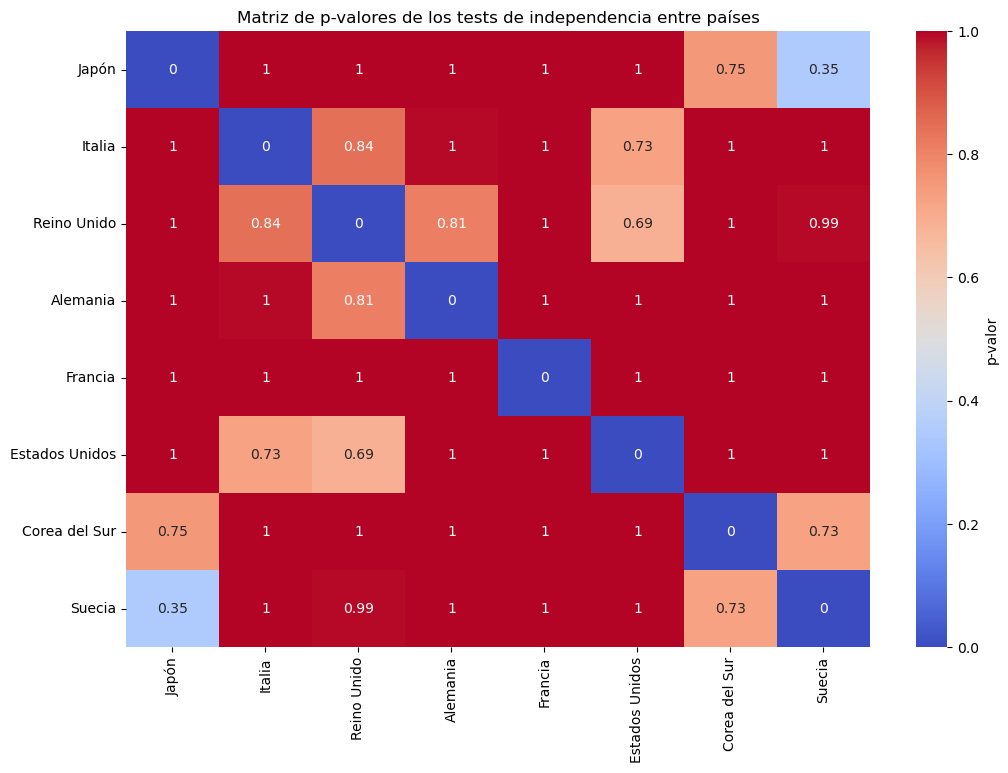

In [ ]:
import pandas as pd
import scipy.stats as stats

# Crear una lista de países únicos en el DataFrame
paises = df['Country'].unique()

# Crear un DataFrame para almacenar los p-valores de los tests de independencia
correlation_matrix = pd.DataFrame(index=paises, columns=paises)

# Realizar el test de independencia (chi-cuadrado) para cada par de países
for pais1 in paises:
    for pais2 in paises:
        if pais1 != pais2:
            # Filtrar los datos para los dos países
            data1 = df[df['Country'] == pais1]['City (L/100 km)']
            data2 = df[df['Country'] == pais2]['City (L/100 km)']

            # Crear una tabla de contingencia solo si ambos conjuntos de datos tienen datos
            if not data1.empty and not data2.empty:
              t_stat, p_val = stats.ttest_ind(data1, data2)
              correlation_matrix.at[pais1, pais2] = 1-round(p_val, 4)
            else:
                correlation_matrix.at[pais1, pais2] = None
        else:
            # Los tests de independencia de un país consigo mismo no son necesarios
            correlation_matrix.at[pais1, pais2] = 0.0

# Convertir a float, ignorando valores None
correlation_matrix = correlation_matrix.astype(float, errors='ignore')

# Mostrar la matriz de correlación con sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'p-valor'})
plt.title('Matriz de p-valores de los tests de independencia entre países')
plt.show()
